## Mathematics of Machine Learning

### Chapter 3: Linear classification methods
### Section 3.5: Kernel SVM Rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import svm
from sklearn.metrics import accuracy_score


#### (0) Data Preparation

In [2]:
# Load data
x = np.genfromtxt("data_KSVM_X.csv", delimiter=',')
y = np.genfromtxt("data_KSVM_Y.csv", delimiter=',')
y = y.reshape(1, y.shape[0])

print(x)
print(x.shape)
print(y)
print(y.shape)


[[ 1.5089    -1.2421     0.77944   -0.63601    2.08      -1.1195
   2.0787     1.4511    -0.062955   1.4188     0.87296    1.6465
   0.96494    1.2225     0.87191    1.0742    -0.64231   -1.3615
   1.0293     2.0509     0.0049774  1.3121    -1.0025     0.032345
   1.0875    -0.6459     0.87039   -1.274      2.089      0.59107
   1.2551     0.27383    1.8136     0.43886   -1.1528     1.6129
   1.5071     1.9671    -0.96362    0.71418   -0.34336    0.59106
   1.9188     1.2788    -0.22822   -1.4466     0.37319    1.986
   0.52529   -1.7024    -1.1013    -0.50514   -1.0874    -0.69811
   1.0069     0.052166  -0.83409   -1.1405     0.40337   -1.4373
  -1.3234    -1.7315     1.5192    -1.4123    -0.71052   -0.024345
  -1.0226    -1.1678     1.7272     0.44944    1.6621    -0.34619
  -0.14277   -0.79034   -1.0144    -0.080932   1.8609     0.21346
  -0.39912   -0.27301    1.371     -0.78323   -1.3642     2.0182
   0.55083   -0.81088    1.5348    -1.5779     0.84646    0.84098
   0.43804    1.

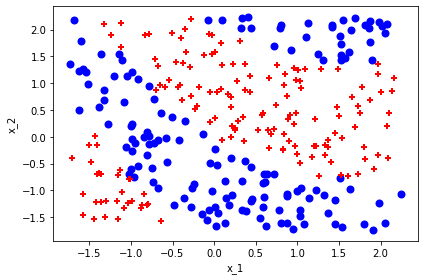

In [3]:
# Plot the training data

fig, ax = plt.subplots()

indp = [i for (i, val) in enumerate(y[0]) if val == 1]
indm = [i for (i, val) in enumerate(y[0]) if val == -1]

ax.scatter(x[0][indp], x[1][indp], c="b", marker="o", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="+", linewidths = 2)

plt.xlabel("x_1")
plt.ylabel("x_2")

fig.tight_layout()

#### (1) Soft Kernel SVM rule (Gaussian kernel)

In [4]:
# Lambda for Soft Rule
m = len(y[0])
lam = 0.5/m

print(m)
print(lam)

300
0.0016666666666666668


In [5]:
# Scaling parameter
kappa = 4

In [6]:
# Create a support vector classifier
KSVM = svm.SVC(C=0.5/m/lam, kernel='rbf', gamma=1/np.sqrt(kappa), probability=True)

# Learn on the train subset
KSVM.fit(x.T, y[0])

SVC(gamma=0.5, probability=True)

In [7]:
# Generate discretization grid
x1 = np.array([i for i in np.arange(-1.75, 2.25 + 4/500, 4/500)]) # Grid points in x1 direction
x1 = x1.reshape(1, x1.shape[0])
x2 = np.array([i for i in np.arange(-1.75, 2.25 + 4/500, 4/500)]) # Grid points in x2 direction
x2 = x2.reshape(1, x2.shape[0])

XX1, XX2 = np.meshgrid(x1, x2) # Create 2D grid

# Grid point matrices as column vectors
X1 = np.ravel(XX1, order='F')
X1 = X1.reshape(X1.shape[0], 1)

X2 = np.ravel(XX2, order='F')
X2 = X2.reshape(X2.shape[0], 1)

print(XX1.shape)
print(XX2.shape)
print(X1.shape)
print(X2.shape)

(501, 501)
(501, 501)
(251001, 1)
(251001, 1)


#### (2.1) Plot the dividing lines

In [8]:
### decision ###
grid_labels = KSVM.decision_function(np.concatenate((X1, X2), axis=1))

# Predicted labels on grid points
# grid_labels = KSVM.predict_proba(np.concatenate((X1, X2), axis=1))
print(grid_labels)
print(grid_labels.shape)
# print(np.reshape(grid_labels, XX1.shape))
# print(grid_labels.shape)

[-2.27427508 -2.28093571 -2.28746194 ...  1.33120694  1.3348002
  1.33820396]
(251001,)


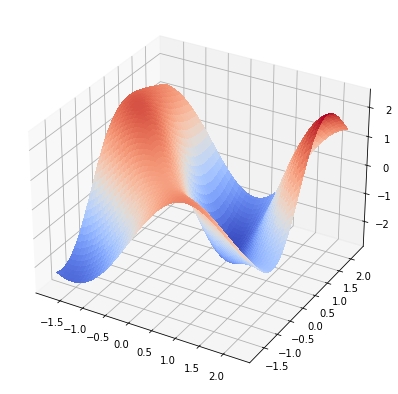

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

ax.plot_surface(XX1, XX2, np.reshape(grid_labels, XX1.shape), cmap=cm.coolwarm, linewidth=0, antialiased=False)

In [10]:
# Get support vectors
support_vectors = KSVM.support_vectors_

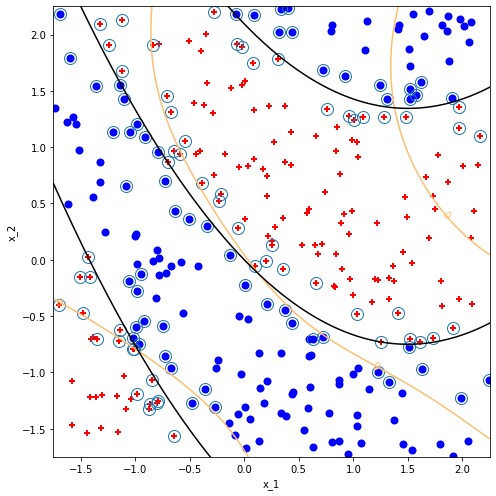

In [11]:
# Plotting

fig, ax = plt.subplots(figsize=(7, 7))

indp = [i for (i, val) in enumerate(y[0]) if val == 1]
indm = [i for (i, val) in enumerate(y[0]) if val == -1]

ax.scatter(x[0][indp], x[1][indp], c="b", marker="o", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="+", linewidths = 2)

# Plot support vectors
plt.plot(support_vectors[:, 0], support_vectors[:, 1], marker="o", markersize=12, markerfacecolor="None", linestyle='None')

# Learned dividing lines
CS = ax.contour(XX1, XX2, np.reshape(grid_labels, XX1.shape), cmap=cm.Paired, levels=0)
ax.clabel(CS, inline=False)

# Plot true dividing lines
plt.plot(x1[0], (x1[0]**2 - 3*x1[0] - 2*0)/3, '-k')
plt.plot(x1[0], (x1[0]**2 - 3*x1[0] - 2*np.pi)/3, '-k')
plt.plot(x1[0], (x1[0]**2 - 3*x1[0] + 2*np.pi)/3, '-k')

plt.ylim(-1.75,2.25)
plt.xlabel("x_1")
plt.ylabel("x_2")

fig.tight_layout()
plt.show()

#### (2.2) Plot RKHS function

In [12]:
# Coordinates of support vectors
SV_supp = support_vectors.T

# Number of support vectors
m_supp = SV_supp.shape[1]
print(m_supp)


114


In [13]:
# Learned coefficients
alphas = KSVM.dual_coef_.T
print(alphas.shape)

b_S = KSVM.intercept_
print(b_S)

kappa_S = 1/KSVM.get_params()['gamma']**2
print(kappa_S)

(114, 1)
[-0.01130465]
4.0


In [14]:
# Distance function to the support vectors
def SV_fun(x): return np.sum((SV_supp - np.tile(x, (1, m_supp)))**2)

In [15]:
# Learned RKHS function
def kfun_S(x): return np.exp(-kappa_S * SV_fun(x)) * alpha_S + b_S

In [16]:
# Values of the RKHS function on the grid
Z = X1
for i in range(len(X1)):
    Z[i] = kfun_S(np.concatenate((X1[i], X2[i])))
print(Z)
print(Z.shape)

ValueError: operands could not be broadcast together with shapes (2,114) (1,228) 

Github link

Decision Function

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html

Wichtige Punkte:
- die Grafik ist besser, wenn gamma=2 ist

# TEST

In [ ]:
# Our dataset and targets
X = np.c_[
    (0.4, -0.7),
    (-1.5, -1),
    (-1.4, -0.9),
    (-1.3, -1.2),
    (-1.1, -0.2),
    (-1.2, -0.4),
    (-0.5, 1.2),
    (-1.5, 2.1),
    (1, 1),
    # --
    (1.3, 0.8),
    (1.2, 0.5),
    (0.2, -2),
    (0.5, -2.4),
    (0.2, -2.3),
    (0, -2.7),
    (1.3, 2.1),
].T
Y = [0] * 8 + [1] * 8
print(X)
print(Y)

# figure number
fignum = 1

# fit the model
clf = svm.SVC(kernel="rbf", gamma=2)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
plt.figure(fignum, figsize=(4, 3))
plt.clf()

plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=80,
    facecolors="none",
    zorder=10,
    edgecolors="k",
)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")

plt.axis("tight")
x_min = -3
x_max = 3
y_min = -3
y_max = 3

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
print('Z', Z)

# Put the result into a color plot
Z = Z.reshape(XX.shape)
print('Z', Z)
plt.figure(fignum, figsize=(4, 3))
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(
    XX,
    YY,
    Z,
    # colors=["k", "k", "k"],
    # linestyles=["--", "-", "--"],
    levels=[-0.5, 0, 0.5],
    # levels = 0
)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
fignum = fignum + 1
plt.show()


In [ ]:
X = np.genfromtxt("data_KSVM_X.csv", delimiter=',').T
Y = np.genfromtxt("data_KSVM_Y.csv", delimiter=',')
print(X)
print(Y)

In [ ]:
# figure number
fignum = 1

# fit the model
clf = svm.SVC(kernel="rbf", gamma=2)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
plt.figure(fignum, figsize=(7, 5))
plt.clf()

plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=80,
    facecolors="none",
    zorder=10,
    edgecolors="k",
)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")

plt.axis("tight")
x_min = -3
x_max = 3
y_min = -3
y_max = 3

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
print('Z', Z)

# Put the result into a color plot
Z = Z.reshape(XX.shape)
print('Z', Z)
plt.figure(fignum, figsize=(4, 3))
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(
    XX,
    YY,
    Z,
    # colors=["k", "k", "k"],
    # linestyles=["--", "-", "--"],
    # levels=[-0.5, 0, 0.5],
    levels = 0
)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
fignum = fignum + 1
plt.show()

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

ax.plot_surface(XX, YY, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)